In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
import os
path_working_directory = os.getcwd()

educacion = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_1_postulantes_educacion.csv"), low_memory=False)
genero_edad = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_2_postulantes_genero_y_edad.csv"), low_memory=False)
visitas = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_3_vistas.csv"), low_memory=False)
postulaciones = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_4_postulaciones.csv"), low_memory=False)
avisos_online = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_5_avisos_online.csv"), low_memory=False)
avisos_detalles = pd.read_csv(os.path.join(path_working_directory, "datos_navent_fiuba", "fiuba_6_avisos_detalle.csv"), low_memory=False)

In [4]:
educacion = educacion[pd.notnull(educacion['nombre'])]
educacion = educacion[pd.notnull(educacion['estado'])]
educacion['elmeme'] = educacion.apply(lambda x: type(x[1]))
#educacion['valido'] = educacion.apply(lambda x: isinstance(x[1], str) and isinstance(x[2], str))
#educacion['edu_completa'] = educacion.apply(lambda x: x[1] + ' ' + x[2])
#educacion.groupby('valido').count()
educacion.head()

,idpostulante,nombre,estado,elmeme
0,NdJl,Posgrado,En Curso,NaN
1,8BkL,Universitario,En Curso,NaN
2,1d2B,Universitario,En Curso,NaN
3,NPBx,Universitario,En Curso,NaN
4,NPBx,Master,En Curso,NaN


In [5]:
genero_edad.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [6]:
visitas.head(1)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [7]:
postulaciones.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [8]:
avisos_online.head(1)
#no aporta nada, solo tiene ids

,idaviso
0,1112355872


In [5]:
#las columnas ciudad y mapacalle tienen demasiados NaN como para aportar alguna infromacion relevante
avisos_detalles.drop('ciudad', axis = 1, inplace = True)
avisos_detalles.drop('mapacalle', axis = 1, inplace = True)
avisos_detalles.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [6]:
#los df que tienen la info del postulante (sin relacion con el aviso)
edu_gen_edad = pd.merge(educacion, genero_edad, on = 'idpostulante', how = 'inner')
edu_gen_edad.head(1)

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC


In [8]:
info_final = pd.merge(edu_gen_edad, visitas, on = 'idpostulante', how = 'inner')
info_final = pd.merge(info_final, postulaciones, on = 'idpostulante', how = 'inner')
#info_final = pd.merge(info_final, avisos_detalles, on = 'idpostulante', how = 'inner')
info_final.head()

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,idAviso,timestamp,idaviso,fechapostulacion
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30
1,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112273308,2018-01-23 07:53:47
2,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112281548,2018-01-24 05:10:12
3,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112260409,2018-01-24 05:17:29
4,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,1112352879,2018-02-26T16:01:12.795-0500,1112293547,2018-01-29 15:41:43


In [9]:
info_final.drop('idAviso', axis = 1, inplace = True)
#info_final.drop('idpostulante', axis = 1, inplace = True)

In [13]:
#info_final_gente = pd.merge(info_final, avisos_detalles, on = 'idaviso', how = 'left')
#info_final_avisos = pd.merge(avisos_detalles, info_final, on = 'idaviso', how = 'left')
info_final.head(1)

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30


In [14]:
avisos_detalles.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [15]:
meme = info_final.groupby('idpostulante').idAviso.count()
meme.head

AttributeError: 'DataFrameGroupBy' object has no attribute 'idAviso'

In [10]:
avisos_detalles.groupby('idpais').count() #son todos del mismo pais
avisos_detalles.drop('idpais', axis = 1, inplace = True)

In [11]:
info_final['chicos'] = info_final['fechanacimiento'].apply(lambda x: x.split('-')[0]<2000 if isinstance(x, str) else True)

In [18]:
info_final.groupby('chicos').count()

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion
chicos,,,,,,,,,
False,58151430,58151430,58151430,0,58151430,58151430,58151430,58151430,58151430
True,375408,375408,375408,0,0,375408,375408,375408,375408


In [12]:
avisos_detalles['nombre_zona'] = avisos_detalles['nombre_zona'].apply(lambda x: 'Gran Buenos Aires' if x == 'GBA Oeste' else x)


In [20]:
info_final.groupby('estado').count()

,idpostulante,nombre,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos
estado,,,,,,,,,
Abandonado,4862290,4862290,0,4823275,4862290,4862290,4862290,4862290,4862290
En Curso,15764063,15764063,0,15648313,15764063,15764063,15764063,15764063,15764063
Graduado,37900485,37900485,0,37679842,37900485,37900485,37900485,37900485,37900485


In [21]:
menes_postulados = pd.merge(educacion, postulaciones, on = 'idpostulante', how = 'inner' )

In [22]:
menes_postulados = pd.merge(menes_postulados, avisos_detalles, on = 'idaviso', how = 'inner')

In [23]:
menes_postulados.head(1)

,idpostulante,nombre,estado,elmeme,idaviso,fechapostulacion,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NdJl,Posgrado,En Curso,NaN,1112261212,2018-01-16 08:50:30,1,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA


In [24]:
#gente con mejores estudios busca mas alto nivel
menes_postulados.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [25]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [ ]:
#grafico de todas las estaciones del primer conjunto

#suponemos un criterio para poca, media y mucha cantidad de bicis disponibles

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]

colors = ["" for x in range(lat37['promedio_bikes_available'].size)]
i = 0
for line in lat37['promedio_bikes_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1
plt.scatter(lat37['lat'], lat37['long'], s=lat37['promedio_bikes_available']*20, c = colors )

plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()
#aregar q si son de un radio menor a x , sean de otro color. tres colores distintos. poco, medio y mucha disponibilidad

In [26]:
avisos_detalles.groupby('nombre_zona').count()

,idaviso,idpais,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
nombre_zona,,,,,,,,
Buenos Aires (fuera de GBA),2,2,2,2,2,2,2,2
Capital Federal,876,876,876,876,876,876,876,876
Gran Buenos Aires,12656,12656,12656,12656,12656,12656,12656,12651


In [28]:
def aEnumNivel(nivel):
    if(nivel == 'Gerencia / Alta Gerencia / Dirección'):
        return 0
    if(nivel == 'Jefe / Supervisor / Responsable'):
        return 1
    if(nivel == 'Junior'):
        return 2
    if(nivel == 'Senior / Semi-Senior'):
        return 3
    return 4
    

In [29]:
def aEnumZona(zona):
    if(zona == 'Buenos Aires (fuera de GBA)'):
        return 0
    if(zona == 'Capital Federal'):
        return 1
    return 2
    

In [27]:
avisos_detalles['nivel_numerico'] = avisos_detalles['nivel_laboral'].apply(lambda x: aEnum(x))
avisos_detalles['zona_numerica'] = avisos_detalles['nombre_zona'].apply(lambda x: aEnum(x))

avisos_detalles.tail()

NameError: global name 'aEnum' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(40)

X = 10*np.random.rand(5, 3)

fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest')

numrows, numcols = X.shape

def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)

ax.format_coord = format_coord
plt.show()

In [38]:
pd.isnull(info_final['fechanacimiento'])

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
58526808    False
58526809    False
58526810    False
58526811    False
58526812    False
58526813    False
58526814    False
58526815    False
58526816    False
58526817    False
58526818    False
58526819    False
58526820    False
58526821    False
58526822    False
58526823    False
58526824    False
58526825    False
58526826    False
58526827    False
58526828    False
58526829    False
58526830    False
58526831    False
58526832  

In [13]:
info_final['edad'] = info_final['fechanacimiento'].apply(lambda x: 2018 - int(x.split('-')[0]) if isinstance(x, str) else None)
info_final.head()

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30,False,49.0
1,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112273308,2018-01-23 07:53:47,False,49.0
2,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112281548,2018-01-24 05:10:12,False,49.0
3,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112260409,2018-01-24 05:17:29,False,49.0
4,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112293547,2018-01-29 15:41:43,False,49.0


In [14]:
info_final.groupby('nombre').edad.mean()

nombre
Doctorado            36.342016
Master               40.594506
Otro                 29.317841
Posgrado             34.245584
Secundario           28.744801
Terciario/Técnico    30.198519
Universitario        30.365624
Name: edad, dtype: float64

In [15]:
info_final.head['estadoEstudios'] = info_final.apply(lambda x: x[1] + ' ' + x[2])

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30,False,49.0


In [17]:
info_final.groupby('nombre').count()

,idpostulante,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad
nombre,,,,,,,,,,
Doctorado,37705,37705,0,37621,37705,37705,37705,37705,37705,37621
Master,655739,655739,0,655329,655739,655739,655739,655739,655739,655329
Otro,4404227,4404227,0,4394283,4404227,4404227,4404227,4404227,4404227,4394283
Posgrado,1128595,1128595,0,1127106,1128595,1128595,1128595,1128595,1128595,1127106
Secundario,20300391,20300391,0,20124959,20300391,20300391,20300391,20300391,20300391,20124959
Terciario/Técnico,9650940,9650940,0,9592742,9650940,9650940,9650940,9650940,9650940,9592742
Universitario,22349241,22349241,0,22219390,22349241,22349241,22349241,22349241,22349241,22219390


In [18]:
info_final.groupby('estado').count()

,idpostulante,nombre,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad
estado,,,,,,,,,,
Abandonado,4862290,4862290,0,4823275,4862290,4862290,4862290,4862290,4862290,4823275
En Curso,15764063,15764063,0,15648313,15764063,15764063,15764063,15764063,15764063,15648313
Graduado,37900485,37900485,0,37679842,37900485,37900485,37900485,37900485,37900485,37679842


In [28]:
cantDocto = info_final.groupby('nombre').count()['idpostulante'][0]
cantMaster = info_final.groupby('nombre').count()['idpostulante'][1]
cantOtro = info_final.groupby('nombre').count()['idpostulante'][2]
cantPosgrado = info_final.groupby('nombre').count()['idpostulante'][3]
cantSecundario = info_final.groupby('nombre').count()['idpostulante'][4]
cantTT= info_final.groupby('nombre').count()['idpostulante'][5]
cantUni = info_final.groupby('nombre').count()['idpostulante'][6]

In [31]:
[cantDocto, cantMaster, cantOtro, cantPosgrado, cantSecundario, cantTT, cantUni]

[37705, 655739, 4404227, 1128595, 20300391, 9650940, 22349241]

In [56]:
info_final['nombre'].value_counts()[2]


9650940

In [104]:
abandonadores = info_final[info_final['estado'] == 'Abandonado']
abandonadores['nombre'].value_counts()

Universitario        3275150
Terciario/Técnico    1056396
Secundario            312504
Otro                  121537
Posgrado               57462
Master                 37965
Doctorado               1276
Name: nombre, dtype: int64

<IPython.core.display.Javascript object>


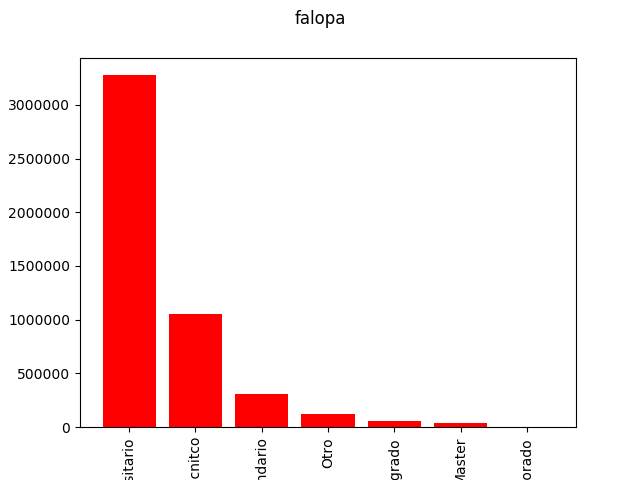

In [106]:
#grafico de barras de tipo de estudio por estado
%matplotlib notebook
cant = abandonadores['nombre'].value_counts().as_matrix()
estados = [1,2,3,4,5,6,7]
momos = ['Universitario', 'Terciario/Tecnitco', 'Secundario', 'Otro', 'Posgrado', 'Master', 'Doctorado']
plt.bar(estados, cant, color = 'red')
plt.suptitle("falopa")
plt.xlabel("Tipo de estudio")
plt.ylabel("Cantidad")
plt.xticks(estados, momos, rotation = 'vertical')
plt.show()

In [119]:
avisos_abandonados = pd.merge(abandonadores, avisos_detalles, how = 'inner', on = 'idaviso')

In [105]:
cursantes = info_final[info_final['estado'] == 'En Curso']
cursantes['nombre'].value_counts()

Universitario        11220963
Terciario/Técnico     2629679
Otro                   919663
Secundario             483577
Posgrado               260740
Master                 229245
Doctorado               20196
Name: nombre, dtype: int64

<IPython.core.display.Javascript object>


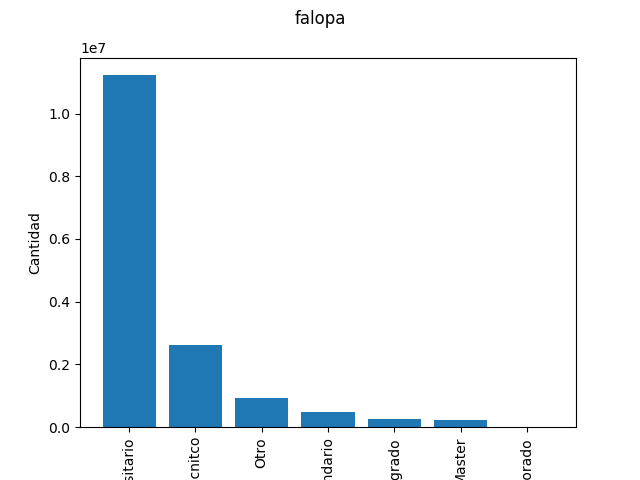

In [107]:
#grafico de barras de tipo de estudio por estado
%matplotlib notebook
cant = cursantes['nombre'].value_counts().as_matrix()
estados = [1,2,3,4,5,6,7]
momos = ['Universitario','Terciario/Tecnitco','Otro', 'Secundario', 'Posgrado', 'Master', 'Doctorado']
plt.bar(estados, cant)
plt.suptitle("falopa")
plt.xlabel("Tipo de estudio")
plt.ylabel("Cantidad")
plt.xticks(estados, momos, rotation = 'vertical')
plt.show()

In [113]:
cursantes.groupby('nombre')['edad'].mean()

nombre
Doctorado            31.909905
Master               31.974602
Otro                 28.799834
Posgrado             31.866243
Secundario           28.286872
Terciario/Técnico    28.129978
Universitario        27.611595
Name: edad, dtype: float64

In [116]:
avisos_encurso = pd.merge(cursantes, avisos_detalles, how = 'inner', on = 'idaviso')

KeyboardInterrupt: 

In [117]:
avisos_encurso.head(1)

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NdJl,Posgrado,En Curso,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30,False,49.0,Jóvenes Profesionales - Responsable Administra...,<p>Nos encontramos en la búsqueda de un<strong...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,Administración,EDUCADO EN ARGENTINA


Full-time          12111240
Part-time           2117795
Pasantia             112198
Temporario            40613
Por Horas             34797
Teletrabajo           17308
Por Contrato          14157
Fines de Semana        4609
Primer empleo           771
Name: tipo_de_trabajo, dtype: int64

In [94]:
graduados = info_final[info_final['estado'] == 'Graduado']

In [120]:
avisos_graduados = pd.merge(graduados, avisos_detalles, how = 'inner', on = 'idaviso')

<IPython.core.display.Javascript object>


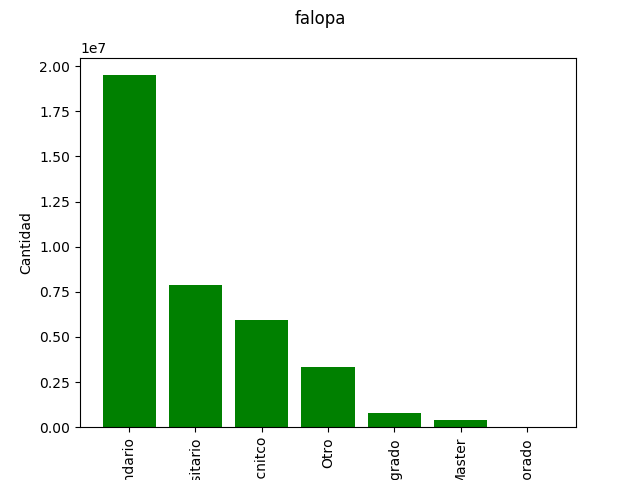

In [99]:
#grafico de barras de tipo de estudio por estado
%matplotlib notebook
cant = graduados['nombre'].value_counts().as_matrix()
estados = [0,1,2,3,4,5,6]
momos = ['Secundario','Universitario','Terciario/Tecnitco', 'Otro', 'Posgrado', 'Master', 'Doctorado']
plt.bar(estados, cant, color = 'green')
plt.suptitle("falopa")
plt.xlabel("Tipo de estudio")
plt.ylabel("Cantidad")
plt.xticks(estados, momos, rotation = 'vertical')
plt.show()

In [115]:
graduados.head()

,idpostulante,nombre,estado,elmeme,fechanacimiento,sexo,timestamp,idaviso,fechapostulacion,chicos,edad
112,NdJl,Universitario,Graduado,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112261212,2018-01-16 08:50:30,False,49.0
113,NdJl,Universitario,Graduado,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112273308,2018-01-23 07:53:47,False,49.0
114,NdJl,Universitario,Graduado,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112281548,2018-01-24 05:10:12,False,49.0
115,NdJl,Universitario,Graduado,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112260409,2018-01-24 05:17:29,False,49.0
116,NdJl,Universitario,Graduado,NaN,1969-05-09,MASC,2018-02-26T16:01:12.795-0500,1112293547,2018-01-29 15:41:43,False,49.0


In [121]:
avisos_encurso['tipo_de_trabajo'].value_counts()

Full-time          12111240
Part-time           2117795
Pasantia             112198
Temporario            40613
Por Horas             34797
Teletrabajo           17308
Por Contrato          14157
Fines de Semana        4609
Primer empleo           771
Name: tipo_de_trabajo, dtype: int64

In [122]:
avisos_abandonados['tipo_de_trabajo'].value_counts()

Full-time          3863510
Part-time           559111
Pasantia             15902
Temporario           13230
Por Horas            10074
Teletrabajo           6030
Por Contrato          4871
Fines de Semana       1626
Primer empleo          107
Name: tipo_de_trabajo, dtype: int64

In [123]:
avisos_graduados['tipo_de_trabajo'].value_counts()

Full-time          30528064
Part-time           3727818
Pasantia             140130
Temporario           100812
Por Horas             89211
Teletrabajo           66630
Por Contrato          38176
Fines de Semana       12391
Primer empleo           769
Name: tipo_de_trabajo, dtype: int64